## Imports divers

In [47]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os
import numpy as np
import random

# Charger le fichier CSV dans un DataFrame
customer = pd.read_csv('customer.csv')

# Afficher les premières lignes du DataFrame pour vérifier le contenu
print(customer.head())


                 customer_unique_id  frequence  montant  moyenne_review_score  \
0  0000366f3b9a7992bf8c76cfdf3221e2          1   141.90                   5.0   
1  0000b849f77a49e4a4ce2b2a4ca5be3f          1    27.19                   4.0   
2  0000f46a3911fa3c0805444483337064          1    86.22                   3.0   
3  0000f6ccb0745a6a4b88665a16c9f078          1    43.62                   4.0   
4  0004aac84e0df4da2b147fca70cf8255          1   196.89                   5.0   

      recence  
0  160.273507  
1  163.263090  
2  585.850868  
3  369.875428  
4  336.905972  


In [48]:
customer.columns

Index(['customer_unique_id', 'frequence', 'montant', 'moyenne_review_score',
       'recence'],
      dtype='object')

## Fixer la seed pour la reproductibilité

In [49]:
# Fixer la graine aléatoire pour numpy
np.random.seed(42)

# Fixer la graine aléatoire pour random
random.seed(42)

# Fixer la graine aléatoire pour scikit-learn
os.environ['PYTHONHASHSEED'] = '42'

## 1er grapheARI / modif recence

ARI après extension de la fenêtre de recence à 315 jours (Cycle 1): 0.9858005193592685
ARI après extension de la fenêtre de recence à 330 jours (Cycle 2): 0.3346476518550156
ARI après extension de la fenêtre de recence à 345 jours (Cycle 3): 0.33490106504123424
ARI après extension de la fenêtre de recence à 360 jours (Cycle 4): 0.3426232895542211
ARI après extension de la fenêtre de recence à 375 jours (Cycle 5): 0.9311829106092976
ARI après extension de la fenêtre de recence à 390 jours (Cycle 6): 0.3344969049317227
ARI après extension de la fenêtre de recence à 405 jours (Cycle 7): 0.33466014516354226
ARI après extension de la fenêtre de recence à 420 jours (Cycle 8): 0.9990019549093911
ARI après extension de la fenêtre de recence à 435 jours (Cycle 9): 0.9998678414470865
ARI après extension de la fenêtre de recence à 450 jours (Cycle 10): 0.33520978089354087
ARI après extension de la fenêtre de recence à 465 jours (Cycle 11): 0.3410840067613401
ARI après extension de la fenêtre de r

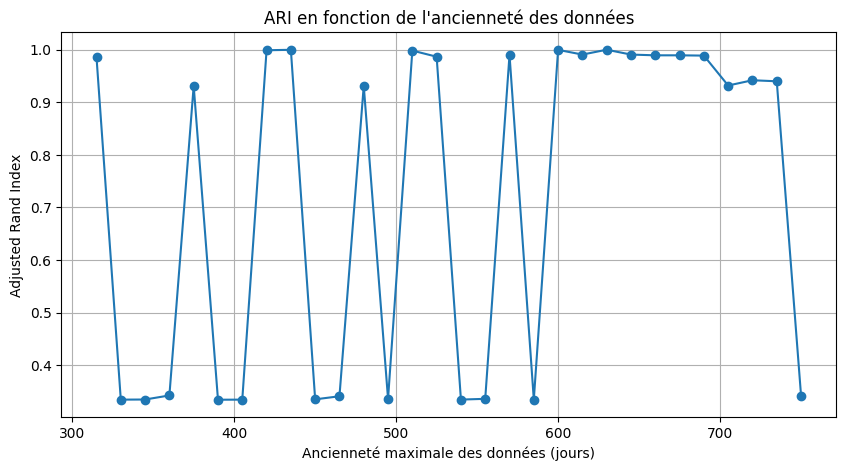

In [50]:


# Chargement des données
customer = pd.read_csv('customer.csv')

# Sélection initiale de la fenêtre de recence
initial_data = customer[(customer['recence'] >= 0) & (customer['recence'] <= 150)]

# Sélectionner uniquement les colonnes nécessaires pour le clustering
columns_to_use = ['frequence', 'montant', 'moyenne_review_score', 'recence']
initial_data = initial_data[columns_to_use]

# Clustering initial avec 4 clusters
kmeans = KMeans(n_clusters=4)
initial_labels = kmeans.fit_predict(initial_data)

# Initialiser la recence maximale à 150 jours
current_max_recence = 300

# Listes pour stocker les résultats pour la visualisation
ar_indices = []
recences = []

# Boucle pour recalculer les clusters avec la nouvelle fenêtre de recence
for i in range(30):  # Ajuster le nombre d'itérations selon le besoin
    # Augmenter la fenêtre de recence de 60 jours
    current_max_recence += 15
    updated_data = customer[(customer['recence'] >= 0) & (customer['recence'] <= current_max_recence)]
    
    # Sélectionner uniquement les colonnes nécessaires pour le clustering
    updated_data = updated_data[columns_to_use]
    
    # Recalculer les clusters avec les données mises à jour
    new_labels_full = kmeans.fit_predict(updated_data)
    
    # Recalculer les labels initiaux pour le sous-ensemble de données qui reste constant
    # Utiliser initial_data pour recalculer les labels de la même manière
    new_labels_initial = kmeans.fit_predict(initial_data)
    
    # Calculer l'ARI pour comparer les nouveaux clusters avec les clusters initiaux recalculés
    ari = adjusted_rand_score(initial_labels, new_labels_initial)
    print(f"ARI après extension de la fenêtre de recence à {current_max_recence} jours (Cycle {i+1}): {ari}")
    
    # Ajouter les valeurs à la liste pour la visualisation
    ar_indices.append(ari)
    recences.append(current_max_recence)
    
    # Réappliquer le clustering sur les données initiales pour conserver la cohérence pour l'itération suivante
    initial_labels = new_labels_initial

# Créer le graphique
plt.figure(figsize=(10, 5))
plt.plot(recences, ar_indices, marker='o', linestyle='-')
plt.title('ARI en fonction de l\'ancienneté des données')
plt.xlabel('Ancienneté maximale des données (jours)')
plt.ylabel('Adjusted Rand Index')
plt.grid(True)
plt.show()


ARI après réduction de la fenêtre de recence à 414.02324074087664 jours (Cycle 1): 0.9985420119610742
ARI après réduction de la fenêtre de recence à 384.02324074087664 jours (Cycle 2): 1.0
ARI après réduction de la fenêtre de recence à 354.02324074087664 jours (Cycle 3): 0.9985420119610742
ARI après réduction de la fenêtre de recence à 324.02324074087664 jours (Cycle 4): 0.994793374095137
ARI après réduction de la fenêtre de recence à 294.02324074087664 jours (Cycle 5): 0.9991616311536213
ARI après réduction de la fenêtre de recence à 264.02324074087664 jours (Cycle 6): 1.0
ARI après réduction de la fenêtre de recence à 234.02324074087664 jours (Cycle 7): 0.9970863702976307
ARI après réduction de la fenêtre de recence à 204.02324074087664 jours (Cycle 8): 0.9985420119610742
ARI après réduction de la fenêtre de recence à 174.02324074087664 jours (Cycle 9): 0.4770673259730858
ARI après réduction de la fenêtre de recence à 144.02324074087664 jours (Cycle 10): 0.4787828684985704
ARI après 

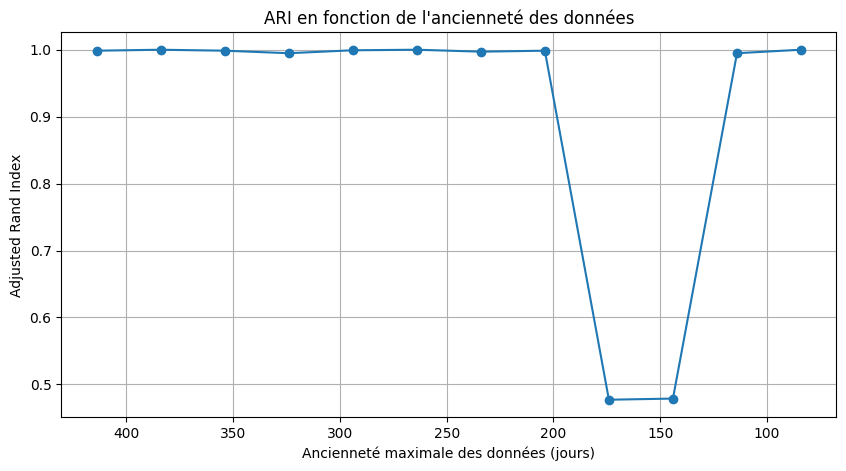

In [51]:

# Chargement des données
customer = pd.read_csv('customer.csv')

# Déterminer la recence maximale et minimale initiale
max_recence = customer['recence'].max()

# Fenêtre de recence initiale pour les données les plus anciennes
initial_data = customer[(customer['recence'] >= max_recence - 150) & (customer['recence'] <= max_recence)]

# Sélectionner uniquement les colonnes nécessaires pour le clustering
columns_to_use = ['frequence', 'montant', 'moyenne_review_score', 'recence']
initial_data = initial_data[columns_to_use]

# Clustering initial avec 4 clusters
kmeans = KMeans(n_clusters=4)
initial_labels = kmeans.fit_predict(initial_data)

# Initialiser la recence maximale à celle du départ moins 150 jours
current_max_recence = max_recence - 300

# Listes pour stocker les résultats pour la visualisation
ar_indices = []
recences = []

# Boucle pour recalculer les clusters en réduisant la fenêtre de recence
for i in range(12):  # Ajuster le nombre d'itérations selon le besoin
    # Réduire la fenêtre de recence de 15 jours à chaque itération
    current_max_recence -= 30
    updated_data = customer[(customer['recence'] > current_max_recence - 150) & (customer['recence'] <= current_max_recence)]
    
    # Sélectionner uniquement les colonnes nécessaires pour le clustering
    updated_data = updated_data[columns_to_use]
    
    # Recalculer les clusters avec les données mises à jour
    new_labels_full = kmeans.fit_predict(updated_data)
    
    # Recalculer les labels initiaux pour le sous-ensemble de données qui reste constant
    new_labels_initial = kmeans.fit_predict(initial_data)
    
    # Calculer l'ARI pour comparer les nouveaux clusters avec les clusters initiaux recalculés
    ari = adjusted_rand_score(initial_labels, new_labels_initial)
    print(f"ARI après réduction de la fenêtre de recence à {current_max_recence} jours (Cycle {i+1}): {ari}")
    
    # Ajouter les valeurs à la liste pour la visualisation
    ar_indices.append(ari)
    recences.append(current_max_recence)
    
    # Réappliquer le clustering sur les données initiales pour conserver la cohérence pour l'itération suivante
    initial_labels = new_labels_initial

# Créer le graphique
plt.figure(figsize=(10, 5))
plt.plot(recences, ar_indices, marker='o', linestyle='-')
plt.title('ARI en fonction de l\'ancienneté des données')
plt.xlabel('Ancienneté maximale des données (jours)')
plt.ylabel('Adjusted Rand Index')
plt.grid(True)
plt.gca().invert_xaxis()  # Inverser l'axe X pour afficher les jours décroissants de gauche à droite
plt.show()


In [52]:
customer['recence'].describe()


count    85368.000000
mean       286.469255
std        152.396022
min         49.103947
25%        163.084042
50%        267.795961
75%        394.925179
max        744.023241
Name: recence, dtype: float64

ARI après réduction de la fenêtre de recence à 354.02324074087664 jours (Cycle 12): 0.9985420119610742
ARI après réduction de la fenêtre de recence à 264.02324074087664 jours (Cycle 12): 0.9970863702976307
ARI après réduction de la fenêtre de recence à 174.02324074087664 jours (Cycle 12): 0.9956315117436803
ARI après réduction de la fenêtre de recence à 84.02324074087664 jours (Cycle 12): 1.0


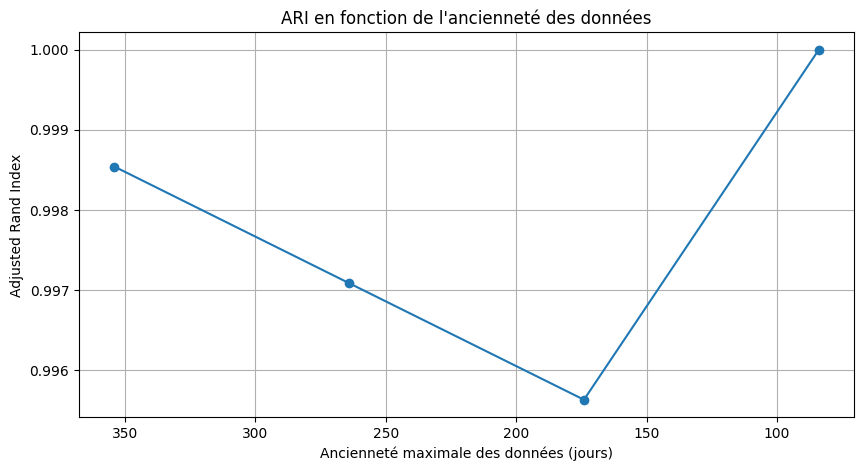

In [53]:

# Chargement des données
customer = pd.read_csv('customer.csv')

# Déterminer la recence maximale et minimale initiale
max_recence = customer['recence'].max()

# Fenêtre de recence initiale pour les données les plus anciennes
initial_data = customer[(customer['recence'] >= max_recence - 150) & (customer['recence'] <= max_recence)]

# Sélectionner uniquement les colonnes nécessaires pour le clustering
columns_to_use = ['frequence', 'montant', 'moyenne_review_score', 'recence']
initial_data = initial_data[columns_to_use]

# Clustering initial avec 4 clusters
kmeans = KMeans(n_clusters=4)
initial_labels = kmeans.fit_predict(initial_data)

# Initialiser la recence maximale à celle du départ moins 150 jours
current_max_recence = max_recence - 300

# Listes pour stocker les résultats pour la visualisation
ar_indices = []
recences = []

# Boucle while pour recalculer les clusters en réduisant la fenêtre de recence
while current_max_recence >= 0:  # Continue tant que la recence est positive
    # Réduire la fenêtre de recence de 30 jours à chaque itération
    current_max_recence -= 90
    updated_data = customer[(customer['recence'] > current_max_recence - 150) & (customer['recence'] <= current_max_recence)]

    # Vérifier si des données sont encore disponibles
    if updated_data.empty:
        break

    # Sélectionner uniquement les colonnes nécessaires pour le clustering
    updated_data = updated_data[columns_to_use]
    
    # Recalculer les clusters avec les données mises à jour
    new_labels_full = kmeans.fit_predict(updated_data)
    
    # Recalculer les labels initiaux pour le sous-ensemble de données qui reste constant
    new_labels_initial = kmeans.fit_predict(initial_data)
    
    # Calculer l'ARI pour comparer les nouveaux clusters avec les clusters initiaux recalculés
    ari = adjusted_rand_score(initial_labels, new_labels_initial)
    print(f"ARI après réduction de la fenêtre de recence à {current_max_recence} jours (Cycle {i+1}): {ari}")
    
    # Ajouter les valeurs à la liste pour la visualisation
    ar_indices.append(ari)
    recences.append(current_max_recence)
    
    # Réappliquer le clustering sur les données initiales pour conserver la cohérence pour l'itération suivante
    initial_labels = new_labels_initial

# Créer le graphique
plt.figure(figsize=(10, 5))
plt.plot(recences, ar_indices, marker='o', linestyle='-')
plt.title('ARI en fonction de l\'ancienneté des données')
plt.xlabel('Ancienneté maximale des données (jours)')
plt.ylabel('Adjusted Rand Index')
plt.grid(True)
plt.gca().invert_xaxis()  # Inverser l'axe X pour afficher les jours décroissants de gauche à droite
plt.show()


## Normalisation

ARI après réduction de la fenêtre de recence à 354.02324074087664 jours (Cycle 12): 0.8328323237543356
ARI après réduction de la fenêtre de recence à 264.02324074087664 jours (Cycle 12): 0.8340752705825
ARI après réduction de la fenêtre de recence à 174.02324074087664 jours (Cycle 12): 0.8328390695219106
ARI après réduction de la fenêtre de recence à 84.02324074087664 jours (Cycle 12): 0.8315991754871761


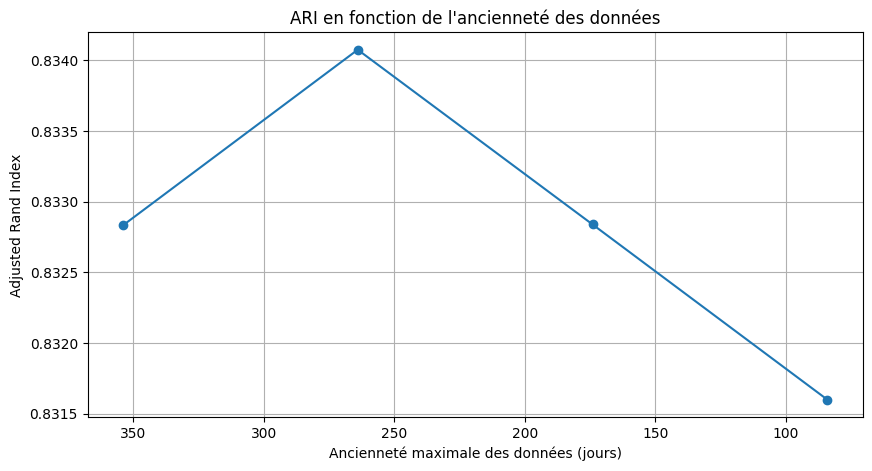

In [54]:


# Chargement des données
customer = pd.read_csv('customer.csv')

# Déterminer la recence maximale et minimale initiale
max_recence = customer['recence'].max()

# Fenêtre de recence initiale pour les données les plus anciennes
initial_data = customer[(customer['recence'] >= max_recence - 150) & (customer['recence'] <= max_recence)]

# Sélectionner uniquement les colonnes nécessaires pour le clustering
columns_to_use = ['frequence', 'montant', 'moyenne_review_score', 'recence']
initial_data = initial_data[columns_to_use]

# Normalisation des données initiales
scaler = StandardScaler()
initial_data_scaled = scaler.fit_transform(initial_data)

# Clustering initial avec 4 clusters
kmeans = KMeans(n_clusters=4)
initial_labels = kmeans.fit_predict(initial_data_scaled)

# Initialiser la recence maximale à celle du départ moins 150 jours
current_max_recence = max_recence - 300

# Listes pour stocker les résultats pour la visualisation
ar_indices = []
recences = []

# Boucle while pour recalculer les clusters en réduisant la fenêtre de recence
while current_max_recence >= 0:  # Continue tant que la recence est positive
    # Réduire la fenêtre de recence de 30 jours à chaque itération
    current_max_recence -= 90
    updated_data = customer[(customer['recence'] > current_max_recence - 150) & (customer['recence'] <= current_max_recence)]

    # Vérifier si des données sont encore disponibles
    if updated_data.empty:
        break

    # Sélectionner uniquement les colonnes nécessaires pour le clustering
    updated_data = updated_data[columns_to_use]
    
    # Normalisation des données mises à jour
    updated_data_scaled = scaler.transform(updated_data)
    
    # Recalculer les clusters avec les données mises à jour
    new_labels_full = kmeans.fit_predict(updated_data_scaled)
    
    # Recalculer les labels initiaux pour le sous-ensemble de données qui reste constant
    new_labels_initial = kmeans.fit_predict(initial_data_scaled)
    
    # Calculer l'ARI pour comparer les nouveaux clusters avec les clusters initiaux recalculés
    ari = adjusted_rand_score(initial_labels, new_labels_initial)
    print(f"ARI après réduction de la fenêtre de recence à {current_max_recence} jours (Cycle {i+1}): {ari}")
    
    # Ajouter les valeurs à la liste pour la visualisation
    ar_indices.append(ari)
    recences.append(current_max_recence)
    
    # Réappliquer le clustering sur les données initiales pour conserver la cohérence pour l'itération suivante
    initial_labels = new_labels_initial

# Créer le graphique
plt.figure(figsize=(10, 5))
plt.plot(recences, ar_indices, marker='o', linestyle='-')
plt.title('ARI en fonction de l\'ancienneté des données')
plt.xlabel('Ancienneté maximale des données (jours)')
plt.ylabel('Adjusted Rand Index')
plt.grid(True)
plt.gca().invert_xaxis()  # Inverser l'axe X pour afficher les jours décroissants de gauche à droite
plt.show()


## Verif oulier / stabilisation

In [55]:
customer.describe()

,frequence,montant,moyenne_review_score,recence
count,85368.000000,85368.000000,85368.000000,85368.000000
mean,1.024693,118.496455,4.165460,286.469255
std,0.163568,75.378629,1.268765,152.396022
min,1.000000,9.590000,1.000000,49.103947
25%,1.000000,60.000000,4.000000,163.084042
50%,1.000000,99.545000,5.000000,267.795961
75%,1.000000,159.800000,5.000000,394.925179
max,6.000000,362.560000,5.000000,744.023241


In [56]:
customer[['frequence', 'montant']].quantile(0.25)

frequence     1.0
montant      60.0
Name: 0.25, dtype: float64

In [57]:
# Calcul des Q1 et Q3
#Q1 = customer[['frequence', 'montant']].quantile(0.25)
#Q3 = customer[['frequence', 'montant']].quantile(0.75)
#IQR = Q3 - Q1

# Définition des règles pour filtrer les outliers dans 'frequence' et 'montant'
#filtre_frequence = (customer['frequence'] >= Q1['frequence'] - 1.5 * IQR['frequence']) & (customer['frequence'] <= Q3['frequence'] + 1.5 * IQR['frequence'])
#filtre_montant = (customer['montant'] >= Q1['montant'] - 1.5 * IQR['montant']) & (customer['montant'] <= Q3['montant'] + 1.5 * IQR['montant'])

# Filtrer le dataframe pour ne garder que les lignes qui ne sont pas des outliers dans les deux colonnes
#customer_clean = customer[filtre_frequence & filtre_montant]

# Vérifier le nouveau dataframe
#print(customer_clean)

#finalement on commente le tout car on a supprimé les outliers précédemment

ARI après réduction de la fenêtre de recence à 529.0232407408766 jours (Cycle 12): 0.9942372093988987
ARI après réduction de la fenêtre de recence à 514.0232407408766 jours (Cycle 12): 1.0
ARI après réduction de la fenêtre de recence à 499.02324074087664 jours (Cycle 12): 1.0
ARI après réduction de la fenêtre de recence à 484.02324074087664 jours (Cycle 12): 1.0
ARI après réduction de la fenêtre de recence à 469.02324074087664 jours (Cycle 12): 0.9899286233020396
ARI après réduction de la fenêtre de recence à 454.02324074087664 jours (Cycle 12): 0.9899286233020396
ARI après réduction de la fenêtre de recence à 439.02324074087664 jours (Cycle 12): 0.9884950166703268
ARI après réduction de la fenêtre de recence à 424.02324074087664 jours (Cycle 12): 0.5859535717749961
ARI après réduction de la fenêtre de recence à 409.02324074087664 jours (Cycle 12): 0.5848739241577006
ARI après réduction de la fenêtre de recence à 394.02324074087664 jours (Cycle 12): 0.9899286233020396
ARI après réducti

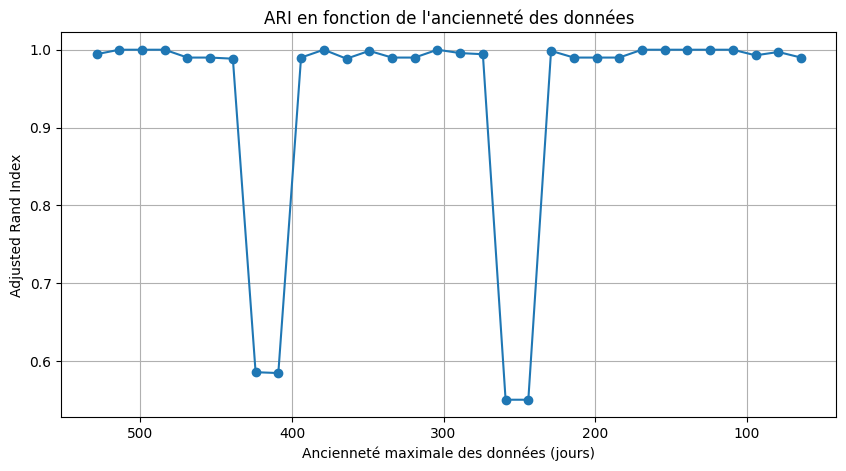

In [58]:


# Déterminer la recence maximale et minimale initiale
max_recence = customer_clean['recence'].max()

# Fenêtre de recence initiale pour les données les plus anciennes
initial_data = customer_clean[(customer_clean['recence'] >= max_recence - 150) & (customer_clean['recence'] <= max_recence)]

# Sélectionner uniquement les colonnes nécessaires pour le clustering
columns_to_use = ['frequence', 'montant', 'moyenne_review_score', 'recence']
initial_data = initial_data[columns_to_use]

# Normalisation des données initiales
scaler = StandardScaler()
initial_data_scaled = scaler.fit_transform(initial_data)

# Clustering initial avec 4 clusters
kmeans = KMeans(n_clusters=4)
initial_labels = kmeans.fit_predict(initial_data_scaled)

# Initialiser la recence maximale à celle du départ moins 150 jours
current_max_recence = max_recence - 200

# Listes pour stocker les résultats pour la visualisation
ar_indices = []
recences = []

# Boucle while pour recalculer les clusters en réduisant la fenêtre de recence
while current_max_recence >= 0:  # Continue tant que la recence est positive
    # Réduire la fenêtre de recence de 30 jours à chaque itération
    current_max_recence -= 15
    updated_data = customer_clean[(customer_clean['recence'] > current_max_recence - 150) & (customer_clean['recence'] <= current_max_recence)]

    # Vérifier si des données sont encore disponibles
    if updated_data.empty:
        break

    # Sélectionner uniquement les colonnes nécessaires pour le clustering
    updated_data = updated_data[columns_to_use]
    
    # Normalisation des données mises à jour
    updated_data_scaled = scaler.transform(updated_data)
    
    # Recalculer les clusters avec les données mises à jour
    new_labels_full = kmeans.fit_predict(updated_data_scaled)
    
    # Recalculer les labels initiaux pour le sous-ensemble de données qui reste constant
    new_labels_initial = kmeans.fit_predict(initial_data_scaled)
    
    # Calculer l'ARI pour comparer les nouveaux clusters avec les clusters initiaux recalculés
    ari = adjusted_rand_score(initial_labels, new_labels_initial)
    print(f"ARI après réduction de la fenêtre de recence à {current_max_recence} jours (Cycle {i+1}): {ari}")
    
    # Ajouter les valeurs à la liste pour la visualisation
    ar_indices.append(ari)
    recences.append(current_max_recence)
    
    # Réappliquer le clustering sur les données initiales pour conserver la cohérence pour l'itération suivante
    initial_labels = new_labels_initial

# Créer le graphique
plt.figure(figsize=(10, 5))
plt.plot(recences, ar_indices, marker='o', linestyle='-')
plt.title('ARI en fonction de l\'ancienneté des données')
plt.xlabel('Ancienneté maximale des données (jours)')
plt.ylabel('Adjusted Rand Index')
plt.grid(True)
plt.gca().invert_xaxis()  # Inverser l'axe X pour afficher les jours décroissants de gauche à droite
plt.show()


## Correction fenêtrage

ARI après augmentation de la fenêtre de recence à 300 jours: 0.9987636855257169
ARI après augmentation de la fenêtre de recence à 315 jours: 0.9120260169853361
ARI après augmentation de la fenêtre de recence à 330 jours: 0.787686894757489
ARI après augmentation de la fenêtre de recence à 345 jours: 0.7310521000098599
ARI après augmentation de la fenêtre de recence à 360 jours: 0.6832045413549155
ARI après augmentation de la fenêtre de recence à 375 jours: 0.6323578481426957
ARI après augmentation de la fenêtre de recence à 390 jours: 0.593433455041068
ARI après augmentation de la fenêtre de recence à 405 jours: 0.5623316734607744
ARI après augmentation de la fenêtre de recence à 420 jours: 0.5513308380981682
ARI après augmentation de la fenêtre de recence à 435 jours: 0.5422860766004886
ARI après augmentation de la fenêtre de recence à 450 jours: 0.5232068195594247
ARI après augmentation de la fenêtre de recence à 465 jours: 0.6036146463779286
ARI après augmentation de la fenêtre de re

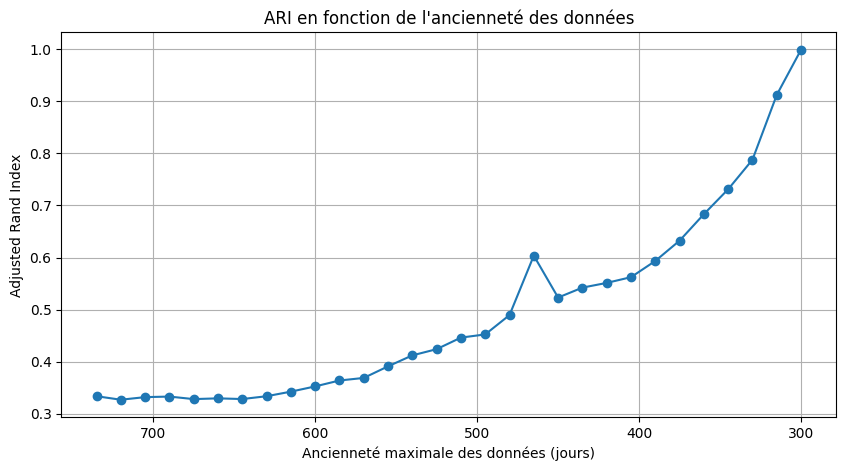

In [59]:


# Déterminer la recence maximale et minimale initiale
max_recence = customer_clean['recence'].max()

# Sélectionner uniquement les colonnes nécessaires pour le clustering
columns_to_use = ['frequence', 'montant', 'moyenne_review_score', 'recence']

# Préparer les données initiales pour la première fenêtre de recence
initial_data = customer_clean[(customer_clean['recence'] <= 300)]
initial_data = initial_data[columns_to_use]

# Normaliser les données
scaler = StandardScaler()
initial_data_scaled = scaler.fit_transform(initial_data)

# Effectuer le clustering initial avec 4 clusters
kmeans = KMeans(n_clusters=4)
initial_labels = kmeans.fit_predict(initial_data_scaled)

# Stockage du sous-ensemble initial pour les comparaisons de l'ARI
base_data_scaled = initial_data_scaled

# Listes pour stocker les résultats pour la visualisation
ar_indices = []
recences = []

# Boucle pour recalculer les clusters en augmentant la fenêtre de recence
current_max_recence = 300
while current_max_recence <= max_recence:
    # Sélectionner les données pour la fenêtre actuelle de recence
    updated_data = customer_clean[(customer_clean['recence'] <= current_max_recence)]
    updated_data = updated_data[columns_to_use]
    updated_data_scaled = scaler.transform(updated_data)
    
    # Recalculer les clusters avec les données mises à jour
    kmeans.fit(updated_data_scaled)
    
    # Extraire le sous-ensemble initial du jeu de données mis à jour pour recalculer les labels
    new_labels_initial = kmeans.predict(base_data_scaled)
    
    # Calculer l'ARI pour comparer les nouveaux labels avec les labels initiaux
    ari = adjusted_rand_score(initial_labels, new_labels_initial)
    print(f"ARI après augmentation de la fenêtre de recence à {current_max_recence} jours: {ari}")
    
    # Ajouter les valeurs à la liste pour la visualisation
    ar_indices.append(ari)
    recences.append(current_max_recence)
    
    # Incrémenter la fenêtre de recence de 15 jours
    current_max_recence += 15

# Créer le graphique
plt.figure(figsize=(10, 5))
plt.plot(recences, ar_indices, marker='o', linestyle='-')
plt.title('ARI en fonction de l\'ancienneté des données')
plt.xlabel('Ancienneté maximale des données (jours)')
plt.ylabel('Adjusted Rand Index')
plt.grid(True)
plt.gca().invert_xaxis()  # Inverser l'axe X pour afficher les jours décroissants de gauche à droite
plt.show()


## Ajout feature age des données

In [60]:
customer_clean

,customer_unique_id,frequence,montant,moyenne_review_score,recence,data_age
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,5.0,160.273507,583.749734
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,4.0,163.263090,580.760150
2,0000f46a3911fa3c0805444483337064,1,86.22,3.0,585.850868,158.172373
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,4.0,369.875428,374.147813
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,5.0,336.905972,407.117269
...,...,...,...,...,...,...
85363,fffbf87b7a1a6fa8b03f081c5f51a201,1,167.32,5.0,293.787234,450.236007
85364,fffea47cd6d3cc0a88bd621562a9d061,1,84.58,4.0,310.890532,433.132708
85365,ffff371b4d645b6ecea244b27531430a,1,112.46,5.0,617.070162,126.953079
85366,ffff5962728ec6157033ef9805bacc48,1,133.69,5.0,168.092095,575.931146


In [61]:
# Calculer la valeur maximale de la recence
max_recence = customer_clean['recence'].max()

# Utiliser .loc pour créer la nouvelle colonne 'data_age'
customer_clean.loc[:, 'data_age'] = max_recence - customer_clean['recence']


In [62]:
customer_clean['data_age'].max()

694.9192939815111

In [63]:
customer_clean['recence'].max()

744.0232407408766

In [64]:
customer_clean['recence'].describe()

count    81100.000000
mean       286.735949
std        152.528804
min         49.103947
25%        163.130472
50%        268.001493
75%        395.754473
max        744.023241
Name: recence, dtype: float64

In [65]:
customer_clean['data_age'].describe()

count    81100.000000
mean       457.287292
std        152.528804
min          0.000000
25%        348.268767
50%        476.021748
75%        580.892769
max        694.919294
Name: data_age, dtype: float64

## nouvel ARI avec age fenetrage sur age des données

ARI après augmentation de la fenêtre d'âge des données à 150 jours: 1.0
ARI après augmentation de la fenêtre d'âge des données à 170 jours: 0.9897224363186147
ARI après augmentation de la fenêtre d'âge des données à 190 jours: 0.9757266720957783
ARI après augmentation de la fenêtre d'âge des données à 210 jours: 0.9554194074261023
ARI après augmentation de la fenêtre d'âge des données à 230 jours: 0.38827739345435874
ARI après augmentation de la fenêtre d'âge des données à 250 jours: 0.22841398165572105
ARI après augmentation de la fenêtre d'âge des données à 270 jours: 0.18185673897381546
ARI après augmentation de la fenêtre d'âge des données à 290 jours: 0.126828891980538
ARI après augmentation de la fenêtre d'âge des données à 310 jours: 0.0011511132124960052
ARI après augmentation de la fenêtre d'âge des données à 330 jours: 0.20818070320366008
ARI après augmentation de la fenêtre d'âge des données à 350 jours: 0.0
ARI après augmentation de la fenêtre d'âge des données à 370 jours:

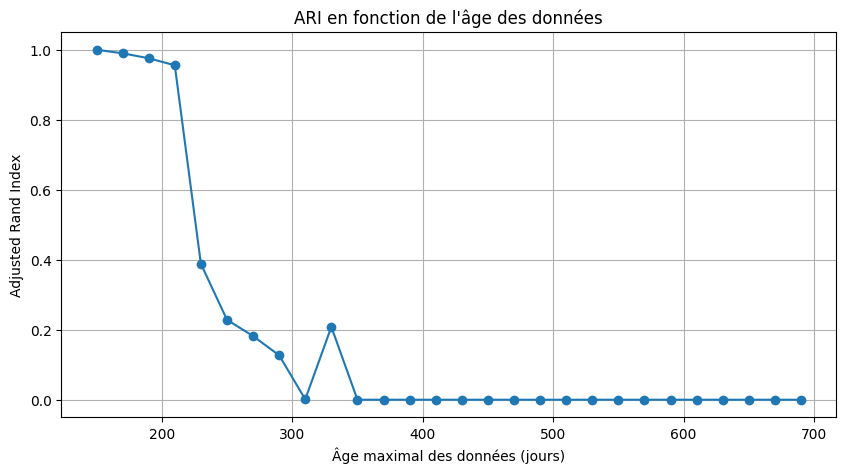

In [66]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Sélectionner uniquement les colonnes nécessaires pour le clustering
columns_to_use = ['frequence', 'montant', 'moyenne_review_score', 'recence']
current_max_data_age = 150


# Préparer les données initiales pour la première fenêtre d'âge des données
initial_data = customer_clean[customer_clean['data_age'] <= current_max_data_age]
initial_data = initial_data[columns_to_use]

# Normaliser les données
scaler = StandardScaler()
initial_data_scaled = scaler.fit_transform(initial_data)

# Effectuer le clustering initial avec 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
initial_labels = kmeans.fit_predict(initial_data_scaled)

# Stockage du sous-ensemble initial pour les comparaisons de l'ARI
base_data_scaled = initial_data_scaled

# Listes pour stocker les résultats pour la visualisation
ar_indices = []
data_ages = []

# Boucle pour recalculer les clusters en augmentant la fenêtre d'âge des données
while current_max_data_age <= customer_clean['data_age'].max():
    # Sélectionner les données pour la fenêtre actuelle d'âge des données
    updated_data = customer_clean[customer_clean['data_age'] <= current_max_data_age]
    updated_data = updated_data[columns_to_use]
    updated_data_scaled = scaler.transform(updated_data)
    
    # Recalculer les clusters avec les données mises à jour
    kmeans.fit(updated_data_scaled)
    
    # Extraire le sous-ensemble initial du jeu de données mis à jour pour recalculer les labels
    new_labels_initial = kmeans.predict(base_data_scaled)
    
    # Calculer l'ARI pour comparer les nouveaux labels avec les labels initiaux
    ari = adjusted_rand_score(initial_labels, new_labels_initial)
    print(f"ARI après augmentation de la fenêtre d'âge des données à {current_max_data_age} jours: {ari}")
    
    # Ajouter les valeurs à la liste pour la visualisation
    ar_indices.append(ari)
    data_ages.append(current_max_data_age)
    
    # Incrémenter la fenêtre d'âge des données de 20 jours
    current_max_data_age += 20

# Créer le graphique
plt.figure(figsize=(10, 5))
plt.plot(data_ages, ar_indices, marker='o', linestyle='-')
plt.title('ARI en fonction de l\'âge des données')
plt.xlabel('Âge maximal des données (jours)')
plt.ylabel('Adjusted Rand Index')
plt.grid(True)
plt.show()


### Ari ac 5clusters

ARI après augmentation de la fenêtre d'âge des données à 150 jours: 1.0
ARI après augmentation de la fenêtre d'âge des données à 170 jours: 0.6531924642765649
ARI après augmentation de la fenêtre d'âge des données à 190 jours: 0.7523220635576994
ARI après augmentation de la fenêtre d'âge des données à 210 jours: 0.6815940820091678
ARI après augmentation de la fenêtre d'âge des données à 230 jours: 0.5340013346077072
ARI après augmentation de la fenêtre d'âge des données à 250 jours: 0.44319746593150355
ARI après augmentation de la fenêtre d'âge des données à 270 jours: 0.5020545704139647
ARI après augmentation de la fenêtre d'âge des données à 290 jours: 0.3843177193529373
ARI après augmentation de la fenêtre d'âge des données à 310 jours: 0.0442442417316127
ARI après augmentation de la fenêtre d'âge des données à 330 jours: 0.1711234020303846
ARI après augmentation de la fenêtre d'âge des données à 350 jours: 0.0
ARI après augmentation de la fenêtre d'âge des données à 370 jours: 0.0


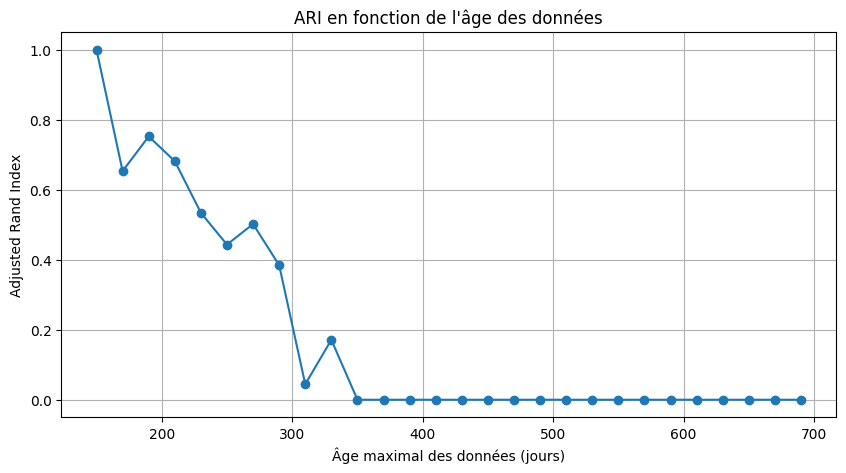

In [67]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Sélectionner uniquement les colonnes nécessaires pour le clustering
columns_to_use = ['frequence', 'montant', 'moyenne_review_score', 'recence']
current_max_data_age = 150


# Préparer les données initiales pour la première fenêtre d'âge des données
initial_data = customer_clean[customer_clean['data_age'] <= current_max_data_age]
initial_data = initial_data[columns_to_use]

# Normaliser les données
scaler = StandardScaler()
initial_data_scaled = scaler.fit_transform(initial_data)

# Effectuer le clustering initial avec 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
initial_labels = kmeans.fit_predict(initial_data_scaled)

# Stockage du sous-ensemble initial pour les comparaisons de l'ARI
base_data_scaled = initial_data_scaled

# Listes pour stocker les résultats pour la visualisation
ar_indices = []
data_ages = []

# Boucle pour recalculer les clusters en augmentant la fenêtre d'âge des données
while current_max_data_age <= customer_clean['data_age'].max():
    # Sélectionner les données pour la fenêtre actuelle d'âge des données
    updated_data = customer_clean[customer_clean['data_age'] <= current_max_data_age]
    updated_data = updated_data[columns_to_use]
    updated_data_scaled = scaler.transform(updated_data)
    
    # Recalculer les clusters avec les données mises à jour
    kmeans.fit(updated_data_scaled)
    
    # Extraire le sous-ensemble initial du jeu de données mis à jour pour recalculer les labels
    new_labels_initial = kmeans.predict(base_data_scaled)
    
    # Calculer l'ARI pour comparer les nouveaux labels avec les labels initiaux
    ari = adjusted_rand_score(initial_labels, new_labels_initial)
    print(f"ARI après augmentation de la fenêtre d'âge des données à {current_max_data_age} jours: {ari}")
    
    # Ajouter les valeurs à la liste pour la visualisation
    ar_indices.append(ari)
    data_ages.append(current_max_data_age)
    
    # Incrémenter la fenêtre d'âge des données de 20 jours
    current_max_data_age += 20

# Créer le graphique
plt.figure(figsize=(10, 5))
plt.plot(data_ages, ar_indices, marker='o', linestyle='-')
plt.title('ARI en fonction de l\'âge des données')
plt.xlabel('Âge maximal des données (jours)')
plt.ylabel('Adjusted Rand Index')
plt.grid(True)
plt.show()
